1.Importing and data preprocessing

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('Fraud.csv')

In [6]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


There are too many data in data set(6,362,620). It takes too many time to process by my laptop. So I reduced them to 600,000.

In [9]:
df1=df.sample(n=600000, random_state=0)

The features important for fraud discoveries include:

- Customer’s identity (email addresses, credit card numbers, etc.)
- The past order details
- Their preferred payment methods, 
- The locations they have used for the transactions 
- Their network

2.Visualization by 'isFraud' 0 or 1

<AxesSubplot:xlabel='isFraud', ylabel='isFlaggedFraud'>

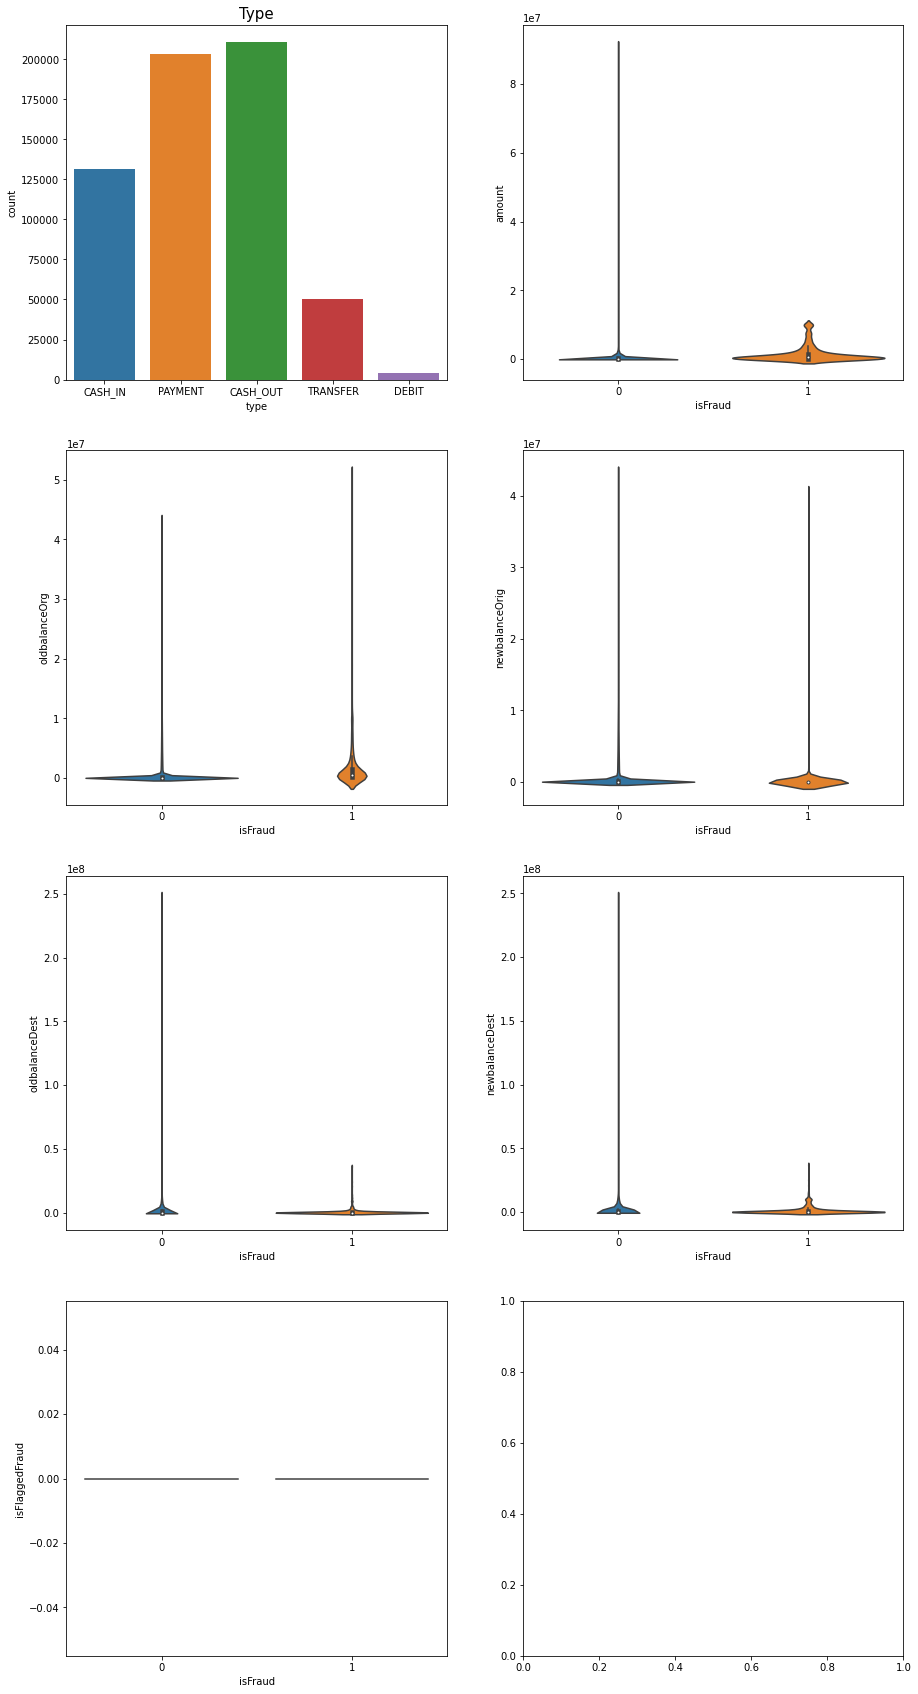

In [10]:
fig,ax=plt.subplots(4,2,figsize=(15,30))
sns.countplot(x=df1.type,ax=ax[0][0]).set_title('Type',size=15)
sns.violinplot(x=df1.isFraud,y=df['amount'],ax=ax[0][1])
sns.violinplot(x=df1.isFraud,y=df['oldbalanceOrg'],ax=ax[1][0])
sns.violinplot(x=df1.isFraud,y=df['newbalanceOrig'],ax=ax[1][1])
sns.violinplot(x=df1.isFraud,y=df['oldbalanceDest'],ax=ax[2][0])
sns.violinplot(x=df1.isFraud,y=df['newbalanceDest'],ax=ax[2][1])
sns.violinplot(x=df1.isFraud,y=df['isFlaggedFraud'],ax=ax[3][0])

3.Prediction model

We will now train an XGBoost classifier, using the oversampled training set. First, we define a function that will perform a grid search for the optimal hyperparameters of the classifier. The highlights of the function are as follows:

We do a parameter search over the hyperparameters given in params

The cross-validation strategy for each model uses 3 folds in a stratified KFold
The metric the models in the search are evaluated on is the Area Under the Receiver Operating Characteristic Curve (ROC AUC)
The function prints the parameters that yield the highest AUC score and returns the parameters of the best estimator as its outpu

In [ ]:
!pip install pycaret[full]

In [15]:
from pycaret.classification import *

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

In [13]:
df2=df1.drop(['step','nameOrig','nameDest','isFlaggedFraud'],axis=1)

In [14]:
df_train, df_test = train_test_split(df2, random_state =100 , test_size = 0.3)

NameError: name 'train_test_split' is not defined

In [16]:
setup_df = setup(data= df_train, target = 'isFraud', 
                session_id=100, data_split_stratify=True, 
                 silent=True, remove_outliers=True)

NameError: name 'setup' is not defined

In [17]:
xgb = create_model("xgboost")

NameError: name 'create_model' is not defined

In [ ]:
plot_model(estimator = xgb , plot= "learning")

In [ ]:
plot_model(estimator = xgb , plot= "auc")

In [ ]:
plot_model(estimator = xgb , plot= "confusion_matrix", plot_kwargs = {'percent' : True})

In [ ]:
plot_model(estimator = xgb, plot = "error")

In [ ]:
plot_model(estimator = xgb, plot = "class_report")

In [ ]:
plot_model(estimator = xgb, plot = "boundary")

In [ ]:
interpret_model(xgb)

In [ ]:
predict_model(xgb);

In [ ]:
pred = predict_model(xgb, data=df_test)
pred.head()

In [ ]:
accuracy_score(pred['isFraud'], pred['Label'])